1. Evaluating how do certain students habits influence academic performance to give insights on design improvement.

In [87]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 219.4 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 273.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 281.8 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.9 kB 347.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 426.7 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 541.9 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 554.9 kB/s eta 0:00:01
   ---------------------------------- --- 266.2/294.9 kB 585.8 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 610.3 kB/s eta 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [70]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('student_habits_performance.csv')
df.head(10)



,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


2. Data Exploratory; missing values, outliers and duplicates

In [65]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [66]:
df.isnull().sum().sum()

np.int64(91)

In [67]:
Q1= df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)
IQR= Q3-Q1
Outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
print(Outliers)


Empty DataFrame
Columns: [student_id, age, gender, study_hours_per_day, social_media_hours, netflix_hours, part_time_job, attendance_percentage, sleep_hours, diet_quality, exercise_frequency, parental_education_level, internet_quality, mental_health_rating, extracurricular_participation, exam_score]
Index: []


In [73]:

df_cleaned = drop_outliers(df, 'age')



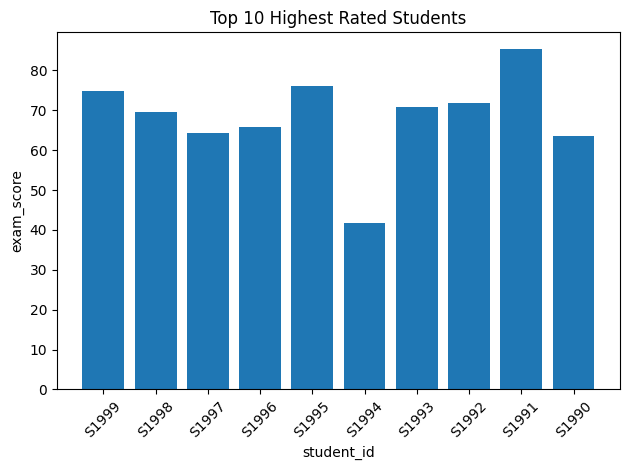

In [81]:
#import matplotlib.pyplot as plt

top_exam_score_students = df.sort_values(by='student_id', ascending=False).head(10)
plt.bar(top_exam_score_students['student_id'], top_exam_score_students['exam_score'])
plt.title('Top 10 Highest Rated Students')
plt.xlabel('student_id')
plt.ylabel('exam_score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [82]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [ ]:

sns.countplot(x='gender', data=df)
plt.title('number of students by gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

NameError: name 'sns' is not defined